In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data1_1 = pd.DataFrame({
    'x1': np.random.normal(1, .5, 1000), 
    'x2': np.random.normal(1, .5, 1000), 
    'y': 1
})
data1_2 = pd.DataFrame({
    'x1': np.random.normal(-1, .5, 10), 
    'x2': np.random.normal(-1, .5, 10), 
    'y': -1
})
data2_1 = pd.DataFrame({
    'x1': np.random.normal(1, .5, 100), 
    'x2': np.random.normal(1, .5, 100), 
    'y': 1
})
data2_2 = pd.DataFrame({
    'x1': np.random.normal(-1, .5, 100), 
    'x2': np.random.normal(-1, .5, 100), 
    'y': -1
})
data1_df = pd.concat([data1_1, data1_2], axis=0).reset_index(drop=True)
data2_df = pd.concat([data2_1, data2_2], axis=0).reset_index(drop=True)

In [30]:
def forward_pass(inputs, W):
    net = np.dot(inputs, W[:-1]) + W[-1]
    if net >= 0:
        h = 1
    else:
        h = -1
    return net, h

In [39]:
def forward_pass_tanh(inputs, W, lamda):
    net = np.dot(inputs, W[:-1]) + W[-1]
    h = np.tanh(net*lamda)
    return net, h

In [42]:
def train_perceptron(X_train, y_train, gradient, max_epochs):
    lamda = 1
    W = np.zeros(X_train.shape[1] + 1)
    lr = .001
    epochs = 1
    while True:
        errors = []
        epochs += 1
        for index in X_train.index:
            if gradient:
                net, h = forward_pass_tanh(X_train.loc[index], W, lamda)
                error = 0.5*(y_train.loc[index] - np.tanh(lamda*net)) ** 2
                W[:-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)*X_train.loc[index]
                W[-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)

            else:
                net, h = forward_pass(X_train.loc[index], W)
                error = y_train.loc[index] - net
                W[:-1] += lr*error*X_train.loc[index]
                W[-1] += lr*error
                
                
            errors.append(error)


        if not any(errors) or epochs > max_epochs:
            break
        if epochs % 10 == 0:
            print('epoch: {}'.format(epochs))
            print('sum of errors: {}'.format(sum(errors)))
    return W

In [33]:
def plot_dividing_lines(x, y, ax, points):
    sns.scatterplot(data=points, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y, color='black', ax=ax)

In [34]:
def find_dividing_line(X_train, y_train, df, gradient, max_epochs):
    W = train_perceptron(X_train, y_train, gradient, max_epochs)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    y = (-W[0]*x - W[-1]) / W[1]
    return W, x, y

In [35]:
def find_misclassifieds(W, X_train, y_train):
    misclassified_indices = []
    for index in X_train.index:
        net, h = forward_pass(X_train.loc[index], W)
        if h != y_train.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

epoch: 10
sum of errors: 19.22053750654106
epoch: 20
sum of errors: 6.675668606054746
epoch: 30
sum of errors: 2.318648096775365
epoch: 40
sum of errors: 0.805335676131747
epoch: 50
sum of errors: 0.2797173571766618
epoch: 60
sum of errors: 0.09715428611682775
epoch: 70
sum of errors: 0.033744618835342965
epoch: 80
sum of errors: 0.011720525695223749
epoch: 90
sum of errors: 0.004070892706836027
epoch: 100
sum of errors: 0.0014139440389075997
epoch: 10
sum of errors: -3.174190353109618
epoch: 20
sum of errors: -0.5704788767839719
epoch: 30
sum of errors: -0.10206326868443882
epoch: 40
sum of errors: -0.02827167954645382
epoch: 50
sum of errors: -0.012816988197514978
epoch: 60
sum of errors: -0.007343358631409225
epoch: 70
sum of errors: -0.0044942390972885216
epoch: 80
sum of errors: -0.002793027347143706
epoch: 90
sum of errors: -0.0017416679900780219
epoch: 100
sum of errors: -0.0010868683675578916


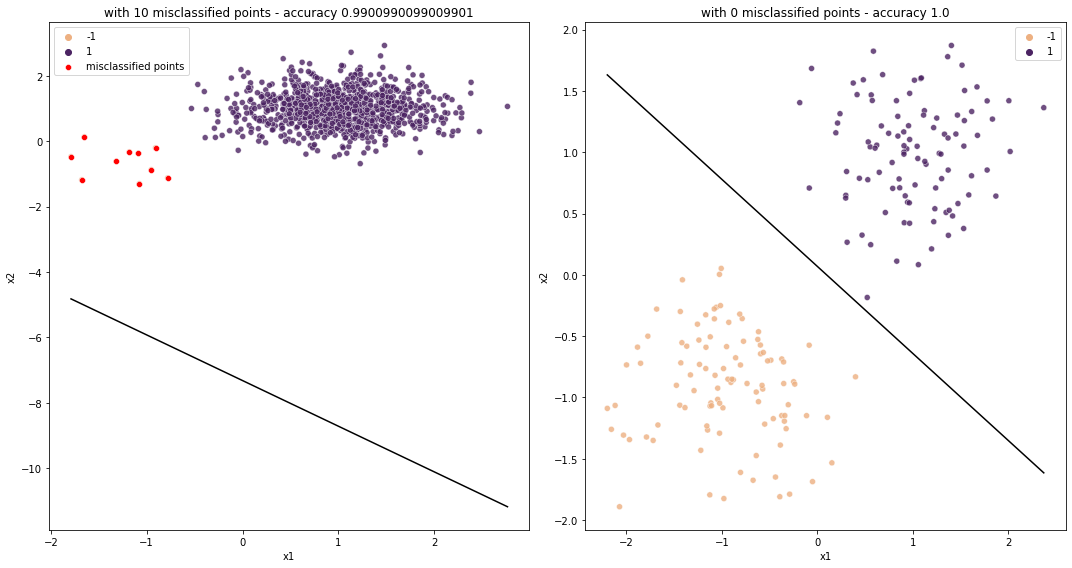

In [37]:
fig = plt.figure(figsize=(15, 8))
for ax_index, data_df in enumerate([data1_df, data2_df]):
    X_train = data_df[['x1', 'x2']]
    y_train = data_df['y']
    W, x, y = find_dividing_line(X_train, y_train, data_df, False, 100)
    ax = plt.subplot(1, 2, ax_index + 1)
    misclassified_indices = find_misclassifieds(W, X_train, y_train)
    plot_dividing_lines(x, y, ax, data_df)
    if len(misclassified_indices):
        sns.scatterplot(data=X_train.loc[misclassified_indices], x='x1', y='x2', ax=ax, color='red', label='misclassified points')
    ax.set_title('with {} misclassified points - accuracy {}'
                 .format(
                     len(misclassified_indices), (X_train.shape[0] - len(misclassified_indices)) / X_train.shape[0])
                )
    plt.tight_layout()

epoch: 10
sum of errors: 7.840092607863689
epoch: 20
sum of errors: 4.712696013562926
epoch: 30
sum of errors: 3.6051739821956086
epoch: 40
sum of errors: 2.995741519764319
epoch: 50
sum of errors: 2.5976602969825153
epoch: 60
sum of errors: 2.3126477425285787
epoch: 70
sum of errors: 2.0964593980701824
epoch: 80
sum of errors: 1.9257663328626373
epoch: 90
sum of errors: 1.7869311188068462
epoch: 100
sum of errors: 1.6713801250722535
epoch: 10
sum of errors: 10.162629053193161
epoch: 20
sum of errors: 5.371966791775728
epoch: 30
sum of errors: 3.825637368219293
epoch: 40
sum of errors: 3.0411970732308693
epoch: 50
sum of errors: 2.55923359226237
epoch: 60
sum of errors: 2.2295714362784054
epoch: 70
sum of errors: 1.9880279068308082
epoch: 80
sum of errors: 1.8023732187007708
epoch: 90
sum of errors: 1.6545619282586308
epoch: 100
sum of errors: 1.5336620602665747


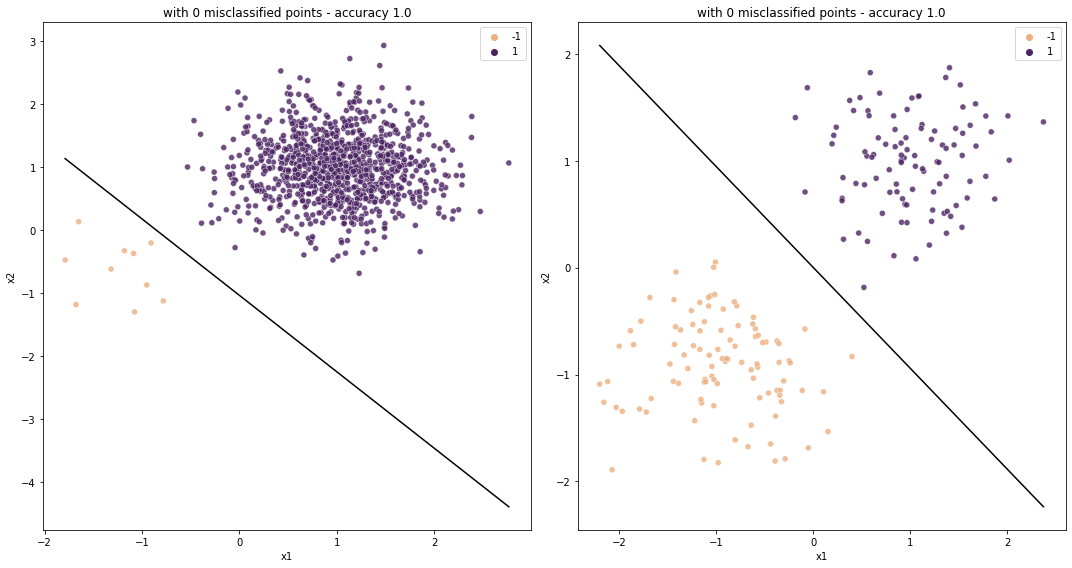

In [43]:
fig = plt.figure(figsize=(15, 8))
for ax_index, data_df in enumerate([data1_df, data2_df]):
    X_train = data_df[['x1', 'x2']]
    y_train = data_df['y']
    W, x, y = find_dividing_line(X_train, y_train, data_df, True, 100)
    ax = plt.subplot(1, 2, ax_index + 1)
    misclassified_indices = find_misclassifieds(W, X_train, y_train)
    plot_dividing_lines(x, y, ax, data_df)
    if len(misclassified_indices):
        sns.scatterplot(data=X_train.loc[misclassified_indices], x='x1', y='x2', ax=ax, color='red', label='misclassified points')
    ax.set_title('with {} misclassified points - accuracy {}'
                 .format(
                     len(misclassified_indices), (X_train.shape[0] - len(misclassified_indices)) / X_train.shape[0])
                )
    plt.tight_layout()